<h2>ZADANIE 2 KONVOLUČNÉ NEURÓNOVÉ SIETE</h2>

In [150]:
# Importing the libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from keras.models import save_model
from tensorflow.keras.callbacks import EarlyStopping

tf.__version__




'2.3.0'

In [151]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.0,
                                   zoom_range = 0.0,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(64, 64),
                                                 batch_size=30,
                                                 class_mode='categorical',
                                                 shuffle=False)


Found 5400 images belonging to 6 classes.


In [152]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (64, 64),
                                            batch_size = 10,
                                            class_mode='categorical',
                                            shuffle=False)


Found 600 images belonging to 6 classes.


In [153]:
training_set.class_indices

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'caesar_salad': 2,
 'caprese_salad': 3,
 'cup_cakes': 4,
 'donuts': 5}

In [10]:
test_set.class_indices

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'caesar_salad': 2,
 'caprese_salad': 3,
 'cup_cakes': 4,
 'donuts': 5}

In [132]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=14, kernel_size=6,
        activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=147, activation='relu'))
#cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

cnn.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['accuracy'])


In [133]:
# Training the CNN on the Training set and evaluating it on the Test set
earlystop = EarlyStopping(monitor="val_accuracy",mode="max",patience=5)
cnn.fit(x=training_set, validation_data=test_set, epochs=80,callbacks=[earlystop])


Epoch 1/80
180/180 [==============================] - 20s 110ms/step - loss: 1.8122 - accuracy: 0.1374 - val_loss: 1.7913 - val_accuracy: 0.2000
Epoch 2/80
180/180 [==============================] - 20s 110ms/step - loss: 1.8006 - accuracy: 0.1446 - val_loss: 1.7909 - val_accuracy: 0.2283
Epoch 3/80
180/180 [==============================] - 20s 110ms/step - loss: 1.7916 - accuracy: 0.1869 - val_loss: 1.7673 - val_accuracy: 0.2300
Epoch 4/80
180/180 [==============================] - 20s 110ms/step - loss: 1.7660 - accuracy: 0.1994 - val_loss: 1.7642 - val_accuracy: 0.2200
Epoch 5/80
180/180 [==============================] - 20s 109ms/step - loss: 1.7859 - accuracy: 0.2315 - val_loss: 1.7180 - val_accuracy: 0.2700
Epoch 6/80
180/180 [==============================] - 20s 110ms/step - loss: 1.7049 - accuracy: 0.2626 - val_loss: 1.6583 - val_accuracy: 0.3083
Epoch 7/80
180/180 [==============================] - 20s 110ms/step - loss: 1.6734 - accuracy: 0.2857 - val_loss: 1.6519 - val_ac

In [134]:

predictions = cnn.predict(test_set)
predictions


array([[3.49840353e-04, 4.01243381e-02, 3.06048663e-04, 8.61791611e-01,
        9.39391926e-02, 3.48899444e-03],
       [1.48364315e-02, 6.95000309e-03, 1.67432539e-02, 4.76494870e-06,
        8.24002624e-01, 1.37462914e-01],
       [9.96635377e-01, 1.79614312e-06, 2.77494168e-04, 7.32005992e-06,
        3.47865025e-05, 3.04320897e-03],
       ...,
       [1.62252590e-01, 5.88155873e-02, 1.39452904e-01, 5.73844850e-01,
        1.36945508e-02, 5.19395061e-02],
       [7.54499924e-04, 7.42419422e-01, 7.67052043e-05, 1.22815229e-01,
        8.46155211e-02, 4.93186750e-02],
       [5.11020608e-03, 1.36462296e-03, 9.80281159e-02, 1.02917872e-01,
        2.78308600e-01, 5.14270604e-01]], dtype=float32)

In [135]:
predictions = np.argmax(predictions, axis=1)
predictions


array([3, 4, 0, 0, 0, 1, 0, 1, 0, 0, 5, 2, 1, 0, 1, 5, 2, 0, 0, 0, 1, 5,
       3, 1, 5, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 3, 5, 1, 4, 0, 1, 0, 0,
       2, 0, 5, 0, 1, 5, 2, 1, 1, 3, 2, 5, 5, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       2, 0, 0, 5, 5, 4, 0, 5, 0, 4, 5, 0, 4, 5, 4, 5, 5, 4, 0, 5, 0, 1,
       3, 0, 0, 5, 0, 3, 2, 2, 1, 5, 1, 5, 1, 1, 1, 5, 1, 5, 1, 1, 5, 1,
       1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 4, 1, 4, 1, 1, 5, 5, 4,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 5, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 5, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 5,
       4, 1, 5, 1, 5, 5, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       5, 1, 4, 1, 2, 2, 4, 2, 5, 0, 2, 2, 2, 2, 0, 0, 2, 2, 4, 2, 5, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2,
       2, 2, 2, 3, 2, 5, 2, 2, 0, 2, 1, 2, 2, 3, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 5, 2, 2, 3, 5, 4, 2, 2, 2, 5, 2, 2, 2, 2, 2,
       3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [136]:
cnn.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 59, 59, 14)        1526      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 29, 29, 14)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 32)        7200      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 147)               795123    
_________________________________________________________________
dense_18 (Dense)             (None, 6)                

In [154]:

img_name = 'apple_pie.jpg'
test_image = image.load_img(img_name, target_size=(64, 64))
test_image = image.img_to_array(test_image)
#testovat naraz mozeme viacero zobrazkov, preto musime pridat este jeden rozmer - testujeme 1 obrazok
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image/255.0)
result


array([[8.6473942e-01, 5.5530097e-04, 1.6876230e-02, 1.9259029e-04,
        5.8007869e-03, 1.1183566e-01]], dtype=float32)

In [155]:
slovnik = {0: "apple pie", 1: "baby back ribs", 2: "caesar salad", 3: "caprese salad",4:"cup cake",5:"donut"}
predikcia = np.argmax(result, axis=1).astype(int)

print('Na obrazku je', slovnik[predikcia[0]])


Na obrazku je apple pie


In [156]:
#vypisanie predikcie do obrazku
import cv2
im = cv2.imread(img_name, 1)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im, slovnik[predikcia[0]], (0, 200),
            font, 2, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imwrite('result-text.jpg', im)


True

In [143]:
#vypis presnosti neuronovej siete
accuracy_score(test_set.classes, predictions)


0.51

In [144]:
#vypis confusion matrixu
cm = confusion_matrix(test_set.classes, predictions)
cm

array([[42, 15,  8,  6,  9, 20],
       [ 2, 70,  3,  7,  5, 13],
       [ 8,  3, 70,  7,  4,  8],
       [ 3, 17, 14, 52,  4, 10],
       [12,  9,  9,  9, 30, 31],
       [13, 21,  9,  8,  7, 42]], dtype=int64)

<AxesSubplot:>

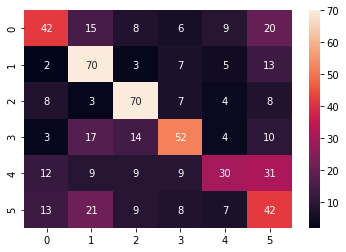

In [157]:
#vypis heatmapy - cim je diagonala svetlejsia, tym lepsia je siet
sns.heatmap(cm, annot=True)

In [158]:
print(classification_report(test_set.classes, predictions))


              precision    recall  f1-score   support

           0       0.53      0.42      0.47       100
           1       0.52      0.70      0.60       100
           2       0.62      0.70      0.66       100
           3       0.58      0.52      0.55       100
           4       0.51      0.30      0.38       100
           5       0.34      0.42      0.38       100

    accuracy                           0.51       600
   macro avg       0.52      0.51      0.50       600
weighted avg       0.52      0.51      0.50       600



In [147]:
#ulozenie ns
model_json = cnn.to_json()
with open('exp2.json', 'w') as json_file:
    json_file.write(model_json)

#ulozenie vahy
network_saved = save_model(cnn, 'weightsExp2.hdf5')


In [148]:
#nacitanie ns
with open('exp2.json', 'r') as json_file:
    json_saved_model = json_file.read()
json_saved_model


'{"class_name": "Sequential", "config": {"name": "sequential_8", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_16_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_16", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 14, "kernel_size": [6, 6], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_16", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides":

In [149]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weightsExp2.hdf5')
network_loaded.compile(loss='categorical_crossentropy',
                       optimizer='Adam', metrics=['accuracy'])
network_loaded.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 59, 59, 14)        1526      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 29, 29, 14)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 32)        7200      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 147)               795123    
_________________________________________________________________
dense_18 (Dense)             (None, 6)                